In [1]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import scipy.ndimage
import itertools
import string
import matplotlib.patches
import glob
import astropy.convolution

import wrf
import netCDF4

import pandas

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [2]:
run_info = 'FMAASO'
skip_time=0

# opening mean fields

## control data

In [3]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400/ens_mean_wrfout_files'
file_list = glob.glob(root_dir+'/'+'wrfout*.nc')
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [4]:
ptot_400 = numpy.load('DATA_ptot_400.npy')
#wa_400 = numpy.load('DATA_wa_400.npy')
ua_400 = numpy.load('DATA_ua_400.npy')
va_400 = numpy.load('DATA_va_400.npy')
#tk_400 = numpy.load('DATA_tk_400.npy')
#prw_400 = numpy.load('DATA_prw_400.npy')

In [5]:
cont_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*.nc')

In [6]:
time = cont_mfds['Times'].values
xlat = cont_mfds['XLAT'].values[0,:,:]
xlong = cont_mfds['XLONG'].values[0,:,:]
landmask = cont_mfds['LANDMASK'].values[0,:,:]
landmask_midpoints = landmask[1:,1:]

In [7]:
qvapor_400 = cont_mfds['QVAPOR']
u_400 = cont_mfds['U']
v_400 = cont_mfds['V']
w_400 = cont_mfds['W']
qcloud_400 = cont_mfds['QCLOUD']
qrain_400 = cont_mfds['QRAIN']
psfc_400 = cont_mfds['PSFC']

In [8]:
ua_400_700mb = wrf.interplevel(ua_400, ptot_400/100., 700.)
ua_400_800mb = wrf.interplevel(ua_400, ptot_400/100., 800.)
ua_400_860mb = wrf.interplevel(ua_400, ptot_400/100., 860.)
ua_400_900mb = wrf.interplevel(ua_400, ptot_400/100., 900.)
ua_400_1000mb = wrf.interplevel(ua_400, ptot_400/100., 1000.)

In [146]:
ua_400_200mb = wrf.interplevel(ua_400, ptot_400/100., 200.)
ua_400_500mb = wrf.interplevel(ua_400, ptot_400/100., 500.)

In [9]:
va_400_700mb = wrf.interplevel(va_400, ptot_400/100., 700.)
va_400_800mb = wrf.interplevel(va_400, ptot_400/100., 800.)
va_400_860mb = wrf.interplevel(va_400, ptot_400/100., 860.)
va_400_900mb = wrf.interplevel(va_400, ptot_400/100., 900.)
va_400_1000mb = wrf.interplevel(va_400, ptot_400/100., 1000.)

In [147]:
va_400_200mb = wrf.interplevel(va_400, ptot_400/100., 200.)
va_400_500mb = wrf.interplevel(va_400, ptot_400/100., 500.)

## phys data

In [10]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000/ens_mean_wrfout_files'
file_list = glob.glob(root_dir+'/'+'wrfout*.nc')
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [11]:
ptot_1000 = numpy.load('DATA_ptot_1000.npy')
#wa_1000 = numpy.load('DATA_wa_1000.npy')
ua_1000 = numpy.load('DATA_ua_1000.npy')
va_1000 = numpy.load('DATA_va_1000.npy')
#tk_1000 = numpy.load('DATA_tk_1000.npy')
#prw_1000 = numpy.load('DATA_prw_1000.npy')

In [12]:
phys_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*.nc')

In [13]:
qvapor_1000 = phys_mfds['QVAPOR']
u_1000 = phys_mfds['U']
v_1000 = phys_mfds['V']
w_1000 = phys_mfds['W']
qcloud_1000 = phys_mfds['QCLOUD']
qrain_1000 = phys_mfds['QRAIN']
psfc_1000 = phys_mfds['PSFC']

In [ ]:
ua_1000_700mb = wrf.interplevel(ua_1000, ptot_1000/100., 700.)
ua_1000_800mb = wrf.interplevel(ua_1000, ptot_1000/100., 800.)
ua_1000_860mb = wrf.interplevel(ua_1000, ptot_1000/100., 860.)
ua_1000_900mb = wrf.interplevel(ua_1000, ptot_1000/100., 900.)
ua_1000_1000mb = wrf.interplevel(ua_1000, ptot_1000/100., 1000.)

In [140]:
ua_1000_200mb = wrf.interplevel(ua_1000, ptot_1000/100., 200.)
ua_1000_500mb = wrf.interplevel(ua_1000, ptot_1000/100., 500.)

In [15]:
va_1000_700mb = wrf.interplevel(va_1000, ptot_1000/100., 700.)
va_1000_800mb = wrf.interplevel(va_1000, ptot_1000/100., 800.)
va_1000_860mb = wrf.interplevel(va_1000, ptot_1000/100., 860.)
va_1000_900mb = wrf.interplevel(va_1000, ptot_1000/100., 900.)
va_1000_1000mb = wrf.interplevel(va_1000, ptot_1000/100., 1000.)

In [142]:
va_1000_200mb = wrf.interplevel(va_1000, ptot_1000/100., 200.)
va_1000_500mb = wrf.interplevel(va_1000, ptot_1000/100., 500.)

## calculate omega at midpoints

In [16]:
omega_400 = numpy.load('DATA_omega_400.npy')
omega_1000 = numpy.load('DATA_omega_1000.npy')

In [17]:
ptot_400 = numpy.load('DATA_ptot_400.npy')
ptot_1000 = numpy.load('DATA_ptot_1000.npy')

# calculate surface pressure changes

In [ ]:
psfc_diffs = psfc_1000.values - psfc_400.values

In [40]:
psfc_diffs_tm_day1 = numpy.mean(psfc_diffs[:24,:,:], axis=0)
psfc_diffs_tm_2to10 = numpy.mean(psfc_diffs[24:,:,:], axis=0)

In [41]:
# replace nans with gaussian weights using astropy
kernel_std = 1
kernel = astropy.convolution.Gaussian2DKernel(x_stddev=kernel_std, y_stddev=kernel_std)

field = psfc_diffs_tm_2to10
field_convolved_psfc_2to10 = astropy.convolution.convolve(field, kernel)

# plots of low-level wind changes

* Use wrf to pull out specific pressure level

In [18]:
diff_ua_700mb = ua_1000_700mb - ua_400_700mb
diff_ua_800mb = ua_1000_800mb - ua_400_800mb
diff_ua_860mb = ua_1000_860mb - ua_400_860mb
diff_ua_900mb = ua_1000_900mb - ua_400_900mb

In [148]:
diff_ua_200mb = ua_1000_200mb - ua_400_200mb
diff_ua_500mb = ua_1000_500mb - ua_400_500mb

In [19]:
diff_va_700mb = va_1000_700mb - va_400_700mb
diff_va_800mb = va_1000_800mb - va_400_800mb
diff_va_860mb = va_1000_860mb - va_400_860mb
diff_va_900mb = va_1000_900mb - va_400_900mb

In [149]:
diff_va_200mb = va_1000_200mb - va_400_200mb
diff_va_500mb = va_1000_500mb - va_400_500mb

In [20]:
diff_ua_1000mb = ua_1000_1000mb - ua_400_1000mb
diff_va_1000mb = va_1000_1000mb - va_400_1000mb

In [150]:
diff_ua_500mb_tm_day1 = numpy.nanmean(diff_ua_500mb[:24,:,:], axis=0)
diff_va_500mb_tm_day1 = numpy.nanmean(diff_va_500mb[:24,:,:], axis=0)
diff_ua_500mb_tm_2to10 = numpy.nanmean(diff_ua_500mb[24:,:,:], axis=0)
diff_va_500mb_tm_2to10 = numpy.nanmean(diff_va_500mb[24:,:,:], axis=0)

diff_ua_200mb_tm_day1 = numpy.nanmean(diff_ua_200mb[:24,:,:], axis=0)
diff_va_200mb_tm_day1 = numpy.nanmean(diff_va_200mb[:24,:,:], axis=0)
diff_ua_200mb_tm_2to10 = numpy.nanmean(diff_ua_200mb[24:,:,:], axis=0)
diff_va_200mb_tm_2to10 = numpy.nanmean(diff_va_200mb[24:,:,:], axis=0)

In [31]:
diff_ua_700mb_tm_day1 = numpy.nanmean(diff_ua_700mb[:24,:,:], axis=0)
diff_va_700mb_tm_day1 = numpy.nanmean(diff_va_700mb[:24,:,:], axis=0)
diff_ua_700mb_tm_2to10 = numpy.nanmean(diff_ua_700mb[24:,:,:], axis=0)
diff_va_700mb_tm_2to10 = numpy.nanmean(diff_va_700mb[24:,:,:], axis=0)

diff_ua_800mb_tm_day1 = numpy.nanmean(diff_ua_800mb[:24,:,:], axis=0)
diff_va_800mb_tm_day1 = numpy.nanmean(diff_va_800mb[:24,:,:], axis=0)
diff_ua_800mb_tm_2to10 = numpy.nanmean(diff_ua_800mb[24:,:,:], axis=0)
diff_va_800mb_tm_2to10 = numpy.nanmean(diff_va_800mb[24:,:,:], axis=0)

diff_ua_860mb_tm_day1 = numpy.nanmean(diff_ua_860mb[:24,:,:], axis=0)
diff_va_860mb_tm_day1 = numpy.nanmean(diff_va_860mb[:24,:,:], axis=0)
diff_ua_860mb_tm_2to10 = numpy.nanmean(diff_ua_860mb[24:,:,:], axis=0)
diff_va_860mb_tm_2to10 = numpy.nanmean(diff_va_860mb[24:,:,:], axis=0)

diff_ua_900mb_tm_day1 = numpy.nanmean(diff_ua_900mb[:24,:,:], axis=0)
diff_va_900mb_tm_day1 = numpy.nanmean(diff_va_900mb[:24,:,:], axis=0)
diff_ua_900mb_tm_2to10 = numpy.nanmean(diff_ua_900mb[24:,:,:], axis=0)
diff_va_900mb_tm_2to10 = numpy.nanmean(diff_va_900mb[24:,:,:], axis=0)

diff_ua_1000mb_tm_day1 = numpy.nanmean(diff_ua_1000mb[:24,:,:], axis=0)
diff_va_1000mb_tm_day1 = numpy.nanmean(diff_va_1000mb[:24,:,:], axis=0)
diff_ua_1000mb_tm_2to10 = numpy.nanmean(diff_ua_1000mb[24:,:,:], axis=0)
diff_va_1000mb_tm_2to10 = numpy.nanmean(diff_va_1000mb[24:,:,:], axis=0)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8

# Define standard kernel

In [109]:
kernel_std=5

In [110]:
# replace nans with gaussian weights using astropy
kernel = astropy.convolution.Gaussian2DKernel(x_stddev=kernel_std, y_stddev=kernel_std)

# for day1
field = diff_ua_700mb_tm_day1
field_convolved_ua_day1_700 = astropy.convolution.convolve(field, kernel)

field = diff_va_700mb_tm_day1
field_convolved_va_day1_700 = astropy.convolution.convolve(field, kernel)

# for days 2-10
field = diff_ua_700mb_tm_2to10
field_convolved_ua_2to10_700 = astropy.convolution.convolve(field, kernel)

field = diff_va_700mb_tm_2to10
field_convolved_va_2to10_700 = astropy.convolution.convolve(field, kernel)

In [111]:
# replace nans with gaussian weights using astropy
kernel = astropy.convolution.Gaussian2DKernel(x_stddev=kernel_std, y_stddev=kernel_std)

# for day1
field = diff_ua_800mb_tm_day1
field_convolved_ua_day1_800 = astropy.convolution.convolve(field, kernel)

field = diff_va_800mb_tm_day1
field_convolved_va_day1_800 = astropy.convolution.convolve(field, kernel)

# for days 2-10
field = diff_ua_800mb_tm_2to10
field_convolved_ua_2to10_800 = astropy.convolution.convolve(field, kernel)

field = diff_va_800mb_tm_2to10
field_convolved_va_2to10_800 = astropy.convolution.convolve(field, kernel)

In [112]:
# replace nans with gaussian weights using astropy
kernel = astropy.convolution.Gaussian2DKernel(x_stddev=kernel_std, y_stddev=kernel_std)

# for day1
field = diff_ua_860mb_tm_day1
field_convolved_ua_day1_860 = astropy.convolution.convolve(field, kernel)

field = diff_va_860mb_tm_day1
field_convolved_va_day1_860 = astropy.convolution.convolve(field, kernel)

# for days 2-10
field = diff_ua_860mb_tm_2to10
field_convolved_ua_2to10_860 = astropy.convolution.convolve(field, kernel)

field = diff_va_860mb_tm_2to10
field_convolved_va_2to10_860 = astropy.convolution.convolve(field, kernel)

In [114]:
# replace nans with gaussian weights using astropy
kernel = astropy.convolution.Gaussian2DKernel(x_stddev=kernel_std, y_stddev=kernel_std)

# for day1
field = diff_ua_900mb_tm_day1
field_convolved_ua_day1_900 = astropy.convolution.convolve(field, kernel)

field = diff_va_900mb_tm_day1
field_convolved_va_day1_900 = astropy.convolution.convolve(field, kernel)

# for days 2-10
field = diff_ua_900mb_tm_2to10
field_convolved_ua_2to10_900 = astropy.convolution.convolve(field, kernel)

field = diff_va_900mb_tm_2to10
field_convolved_va_2to10_900 = astropy.convolution.convolve(field, kernel)

In [115]:
# replace nans with gaussian weights using astropy
kernel = astropy.convolution.Gaussian2DKernel(x_stddev=kernel_std, y_stddev=kernel_std)

# for day1
field = diff_ua_1000mb_tm_day1
field_convolved_ua_day1_1000 = astropy.convolution.convolve(field, kernel)

field = diff_va_1000mb_tm_day1
field_convolved_va_day1_1000 = astropy.convolution.convolve(field, kernel)

# for days 2-10
field = diff_ua_1000mb_tm_2to10
field_convolved_ua_2to10_1000 = astropy.convolution.convolve(field, kernel)

field = diff_va_1000mb_tm_2to10
field_convolved_va_2to10_1000 = astropy.convolution.convolve(field, kernel)

In [152]:
# replace nans with gaussian weights using astropy
kernel = astropy.convolution.Gaussian2DKernel(x_stddev=kernel_std, y_stddev=kernel_std)

# for day1
field = diff_ua_200mb_tm_day1
field_convolved_ua_day1_200 = astropy.convolution.convolve(field, kernel)

field = diff_va_200mb_tm_day1
field_convolved_va_day1_200 = astropy.convolution.convolve(field, kernel)

# for days 2-10
field = diff_ua_200mb_tm_2to10
field_convolved_ua_2to10_200 = astropy.convolution.convolve(field, kernel)

field = diff_va_200mb_tm_2to10
field_convolved_va_2to10_200 = astropy.convolution.convolve(field, kernel)

In [151]:
# replace nans with gaussian weights using astropy
kernel = astropy.convolution.Gaussian2DKernel(x_stddev=kernel_std, y_stddev=kernel_std)

# for day1
field = diff_ua_500mb_tm_day1
field_convolved_ua_day1_500 = astropy.convolution.convolve(field, kernel)

field = diff_va_500mb_tm_day1
field_convolved_va_day1_500 = astropy.convolution.convolve(field, kernel)

# for days 2-10
field = diff_ua_500mb_tm_2to10
field_convolved_ua_2to10_500 = astropy.convolution.convolve(field, kernel)

field = diff_va_500mb_tm_2to10
field_convolved_va_2to10_500 = astropy.convolution.convolve(field, kernel)

# plot

# panel plot with all

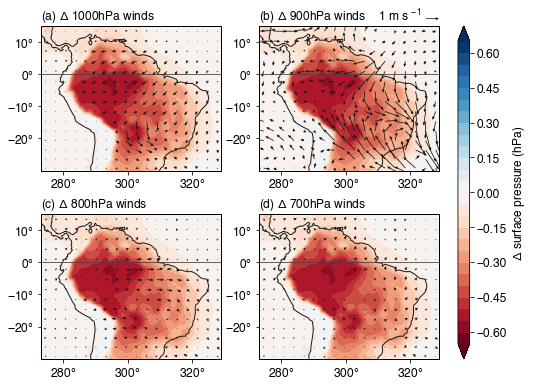

In [154]:
map_crs = cartopy.crs.PlateCarree()

fontsize=12
lon_offset = 25.

diff_levels = numpy.arange(-.65,.651,0.05)

every_nth_lat=7
every_nth_lon=7
quiver_scale = 0.25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 0.25
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

fig = mp.figure(figsize=(6.5,5.25))

plot_list_u = [field_convolved_ua_2to10_1000, \
               field_convolved_ua_2to10_900, \
               field_convolved_ua_2to10_800, \
               field_convolved_ua_2to10_700]
               
plot_list_v = [field_convolved_va_2to10_1000, \
               field_convolved_va_2to10_900, \
               field_convolved_va_2to10_800, \
               field_convolved_va_2to10_700]

plot_label = ['1000','900','800','700']

ax_list = []
for i in range(4):
    ax = fig.add_subplot(2,2,i+1, projection=map_crs)
    ax.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
    ax.coastlines(color='0.1')
    contour_plot = ax.contourf(xlong,xlat,field_convolved_psfc_2to10/100., \
                                 levels=diff_levels, extend='both', \
                                 #vmin=diff_levels.min(),vmax=diff_levels.max(),\
                                 cmap='RdBu')

    quiver_plot = ax.quiver(xlong[::every_nth_lat,::every_nth_lon], \
                            xlat[::every_nth_lat,::every_nth_lon], \
                            plot_list_u[i][::every_nth_lat,::every_nth_lon], \
                            plot_list_v[i][::every_nth_lat,::every_nth_lon], \
                            units='xy', scale=quiver_scale, \
                            color=quiver_color,\
                            #headaxislength=quiver_head_axis_length, \
                            zorder=2, transform=map_crs, \
                            width=quiver_shaft_width, \
                            headwidth=quiver_head_width, \
                            headlength=quiver_head_length)
    
    if i==1:
        quiver_plot_for_key = quiver_plot

    ax.text(s='('+string.ascii_lowercase[i]+') $\Delta$ '+plot_label[i]+'hPa winds', x=0, y=1.01,\
             ha='left', va='bottom', \
             transform=ax.transAxes, fontsize=fontsize)

    ax.set_xticks([-360+280,-360+300,-360+320])
    ax.set_yticks([-20,-10,0,10])
    ax.tick_params(labelsize=fontsize)
    ax.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
    ax.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

    ax.gridlines(ylocs=[0], color='0.25')
    
    ax_list.append(ax)
               
fig.tight_layout(h_pad=2, w_pad=-1)



quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.05, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)



axpos1 = ax_list[1].get_position()
axpos2 = ax_list[-1].get_position()

cbar_ax = fig.add_axes([axpos2.x1+0.025,axpos2.y0,0.025,axpos1.y1-axpos2.y0])
cbar = mp.colorbar(contour_plot, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('$\Delta$ surface pressure (hPa)', fontsize=fontsize)

fig.savefig('manuscript_figXX_supp_winds_at_pressure_levels.png', dpi=600, bbox_inches='tight', transparent=True)

# for 500 and 200 hpa winds

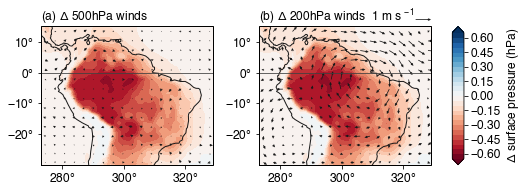

In [157]:
map_crs = cartopy.crs.PlateCarree()

fontsize=12
lon_offset = 25.

diff_levels = numpy.arange(-.65,.651,0.05)

every_nth_lat=7
every_nth_lon=7
quiver_scale = 0.2 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 0.25
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

fig = mp.figure(figsize=(6.5,2.5))

plot_list_u = [field_convolved_ua_2to10_500, \
               field_convolved_ua_2to10_200]
               
plot_list_v = [field_convolved_va_2to10_500, \
               field_convolved_va_2to10_200]

plot_label = ['500','200']

ax_list = []
for i in range(2):
    ax = fig.add_subplot(1,2,i+1, projection=map_crs)
    ax.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
    ax.coastlines(color='0.1')
    contour_plot = ax.contourf(xlong,xlat,field_convolved_psfc_2to10/100., \
                                 levels=diff_levels, extend='both', \
                                 #vmin=diff_levels.min(),vmax=diff_levels.max(),\
                                 cmap='RdBu')

    quiver_plot = ax.quiver(xlong[::every_nth_lat,::every_nth_lon], \
                            xlat[::every_nth_lat,::every_nth_lon], \
                            plot_list_u[i][::every_nth_lat,::every_nth_lon], \
                            plot_list_v[i][::every_nth_lat,::every_nth_lon], \
                            units='xy', scale=quiver_scale, \
                            color=quiver_color,\
                            #headaxislength=quiver_head_axis_length, \
                            zorder=2, transform=map_crs, \
                            width=quiver_shaft_width, \
                            headwidth=quiver_head_width, \
                            headlength=quiver_head_length)
    
    if i==1:
        quiver_plot_for_key = quiver_plot

    ax.text(s='('+string.ascii_lowercase[i]+') $\Delta$ '+plot_label[i]+'hPa winds', x=0, y=1.01,\
             ha='left', va='bottom', \
             transform=ax.transAxes, fontsize=fontsize)

    ax.set_xticks([-360+280,-360+300,-360+320])
    ax.set_yticks([-20,-10,0,10])
    ax.tick_params(labelsize=fontsize)
    ax.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
    ax.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

    ax.gridlines(ylocs=[0], color='0.25')
    
    ax_list.append(ax)
               
fig.tight_layout(h_pad=2, w_pad=-1)



quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.05, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)



axpos1 = ax_list[1].get_position()
axpos2 = ax_list[-1].get_position()

cbar_ax = fig.add_axes([axpos2.x1+0.025,axpos2.y0,0.025,axpos1.y1-axpos2.y0])
cbar = mp.colorbar(contour_plot, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('$\Delta$ surface pressure (hPa)', fontsize=fontsize)

fig.savefig('manuscript_figXX_supp_winds_at_pressure_levels_500_200.png', dpi=600, bbox_inches='tight', transparent=True)

# calculate wind divergence

In [117]:
dudx_400_900mb = numpy.diff(ua_400_900mb, axis=2)/50000.
dvdy_400_900mb = numpy.diff(va_400_900mb, axis=1)/50000.

In [118]:
dudx_1000_900mb = numpy.diff(ua_1000_900mb, axis=2)/50000.
dvdy_1000_900mb = numpy.diff(va_1000_900mb, axis=1)/50000.

In [119]:
diff_dudx_900mb = dudx_1000_900mb - dudx_400_900mb
diff_dvdy_900mb = dvdy_1000_900mb - dvdy_400_900mb

In [120]:
diff_dudx_900mb.shape

(241, 179, 288)

In [121]:
diff_dvdy_900mb.shape

(241, 178, 289)

In [122]:
diff_dudx_900mb_midpoints = 0.5*(diff_dudx_900mb[:,1:,:]+diff_dudx_900mb[:,:-1,:])
diff_dvdy_900mb_midpoints = 0.5*(diff_dvdy_900mb[:,:,1:]+diff_dvdy_900mb[:,:,:-1])

In [123]:
diff_div_900mb = (diff_dudx_900mb_midpoints + diff_dvdy_900mb_midpoints)

In [132]:
diff_div_900mb_tm_2to10 = numpy.nanmean(diff_div_900mb[24:,:,:], axis=0)
diff_div_900mb_tm_day1 = numpy.nanmean(diff_div_900mb[:24,:,:], axis=0)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [133]:
# replace nans with gaussian weights using astropy
kernel_std = 5
kernel = astropy.convolution.Gaussian2DKernel(x_stddev=kernel_std, y_stddev=kernel_std)

field = diff_div_900mb_tm_2to10
field_convolved_div_2to10 = astropy.convolution.convolve(field, kernel)

field = diff_div_900mb_tm_day1
field_convolved_div_day1 = astropy.convolution.convolve(field, kernel)

In [126]:
xlat_midpoints = 0.5*(xlat[1:,1:]+xlat[:-1,:-1])
xlong_midpoints = 0.5*(xlong[1:,1:]+xlong[:-1,:-1])

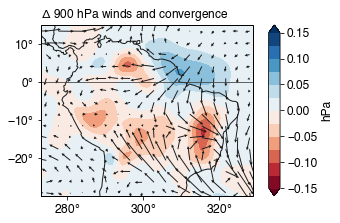

In [138]:
map_crs = cartopy.crs.PlateCarree()

fontsize=12
lon_offset = 25.

diff_levels = numpy.arange(-.15,.151,0.025)

every_nth_lat=7
every_nth_lon=7
quiver_scale = 0.25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 0.25
quiver_key_scale = 3
quiver_color = '0.1'
quiver_head_length = 3
quiver_head_axis_length = quiver_head_length
    
fig = mp.figure(figsize=(4,3))
ax = fig.add_subplot(111, projection=map_crs)
ax.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax.coastlines(color='0.1')
contour_plot = ax.contourf(xlong_midpoints,xlat_midpoints,field_convolved_div_2to10*86400., \
                             levels=diff_levels, extend='both', \
                             #vmin=diff_levels.min(),vmax=diff_levels.max(),\
                             cmap='RdBu')

quiver_plot = ax.quiver(xlong[::every_nth_lat,::every_nth_lon], \
                        xlat[::every_nth_lat,::every_nth_lon], \
                        field_convolved_ua_2to10_900[::every_nth_lat,::every_nth_lon], \
                        field_convolved_va_2to10_900[::every_nth_lat,::every_nth_lon], \
                        units='xy', scale=quiver_scale, width=quiver_shaft_width, \
                        color=quiver_color,\
                        headlength=quiver_head_length, \
                        headaxislength=quiver_head_axis_length, \
                        zorder=2, transform=map_crs)    

ax.text(s="$\Delta$ 900 hPa winds and convergence", x=0, y=1.01,\
         ha='left', va='bottom', \
         transform=ax.transAxes, fontsize=fontsize)

ax.set_xticks([-360+280,-360+300,-360+320])
ax.set_yticks([-20,-10,0,10])
ax.tick_params(labelsize=fontsize)
ax.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax.gridlines(ylocs=[0], color='0.25')

fig.tight_layout()

ax_pos = ax.get_position()

cbar_ax = fig.add_axes([ax_pos.x1,ax_pos.y0,0.04,ax_pos.height])
cbar = mp.colorbar(contour_plot, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('hPa', fontsize=fontsize)

In [136]:
dudx_400 = numpy.diff(u_400, axis=3)/50000.
dvdy_400 = numpy.diff(v_400, axis=2)/50000.

In [137]:
dudx_1000 = numpy.diff(u_1000, axis=3)/50000.
dvdy_1000 = numpy.diff(v_1000, axis=2)/50000.

In [138]:
diff_dudx = dudx_1000-dudx_400
diff_dvdy = dvdy_1000-dvdy_400

In [139]:
diff_dudx_below860 = numpy.copy(diff_dudx)
diff_dvdy_below860 = numpy.copy(diff_dvdy)

In [140]:
diff_dudx_below860[ptot_400<86000.] = numpy.nan
diff_dvdy_below860[ptot_400<86000.] = numpy.nan

In [142]:
diff_dudx_below860_vertmean = numpy.nanmean(diff_dudx_below860, axis=1)
diff_dvdy_below860_vertmean = numpy.nanmean(diff_dvdy_below860, axis=1)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [143]:
diff_conv_below860_vertmean = -(diff_dudx_below860_vertmean+diff_dvdy_below860_vertmean)

In [147]:
diff_conv_below860_tm_day1 = numpy.nanmean(diff_conv_below860_vertmean[:24,:,:], axis=0)
diff_conv_below860_tm_2to10 = numpy.nanmean(diff_conv_below860_vertmean[24:,:,:], axis=0)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


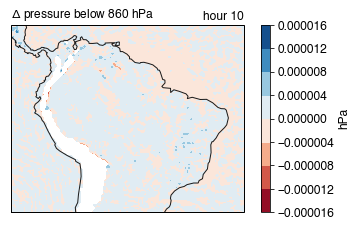

In [148]:
fontsize=12
lon_offset = 25.

diff_levels = numpy.arange(-.15,.151,0.025)

every_nth_lat=3
every_nth_lon=3
quiver_scale = 0.5 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 0.2
quiver_key_scale = 3
quiver_color = '0.1'
quiver_head_length = 3
quiver_head_axis_length = quiver_head_length

fig = mp.figure(figsize=(5,3))
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax.coastlines(color='0.1')
contour_plot = ax.contourf(xlong,xlat,diff_conv_below860_tm_2to10, \
                             #levels=diff_levels, extend='both', \
                             #vmin=diff_levels.min(),vmax=diff_levels.max(),\
                             cmap='RdBu')

ax.text(s="$\Delta$ pressure below 860 hPa", x=0, y=1.01,\
         ha='left', va='bottom', \
         transform=ax.transAxes, fontsize=fontsize)
ax.text(s='hour '+'{:02d}'.format(t), x=1, y=1.01, \
         ha='right', va='bottom', transform=ax.transAxes, \
         fontsize=fontsize)

fig.tight_layout()

#ax.background_patch.set_facecolor('0.5')

ax_pos = ax.get_position()
cbar = mp.colorbar(contour_plot)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('hPa', fontsize=fontsize)

#fig.savefig('hourly_ptot_below860_change_hour'+ '{:02d}'.format(t)+'.png', dpi=600, bbox_inches='tight', transparent=True)
#mp.close()